In [11]:
# 1. Import libraries
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
plt.style.use('seaborn-v0_8')

In [13]:
# 2. Load dataset (update the path to where your CSV is stored)
df = pd.read_csv("netflix_movies_detailed_up_to_2025.csv")

In [14]:
# 3. Quick check
print("Dataset shape:", df.shape)
df.head()

Dataset shape: (16000, 18)


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,genres,language,description,popularity,vote_count,vote_average,budget,revenue
0,10192,Movie,Shrek Forever After,Mike Mitchell,"Mike Myers, Eddie Murphy, Cameron Diaz, Antoni...",United States of America,2010-05-16,2010,6.380,NaN,"Comedy, Adventure, Fantasy, Animation, Family",en,A bored and domesticated Shrek pacts with deal...,203.893,7449,6.380,165000000,752600867
1,27205,Movie,Inception,Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ken W...","United Kingdom, United States of America",2010-07-15,2010,8.369,NaN,"Action, Science Fiction, Adventure",en,"Cobb, a skilled thief who commits corporate es...",156.242,37119,8.369,160000000,839030630
2,12444,Movie,Harry Potter and the Deathly Hallows: Part 1,David Yates,"Daniel Radcliffe, Emma Watson, Rupert Grint, T...","United Kingdom, United States of America",2010-11-17,2010,7.744,NaN,"Adventure, Fantasy",en,"Harry, Ron and Hermione walk away from their l...",121.191,19327,7.744,250000000,954305868
3,38757,Movie,Tangled,"Byron Howard, Nathan Greno","Mandy Moore, Zachary Levi, Donna Murphy, Ron P...",United States of America,2010-11-24,2010,7.600,NaN,"Animation, Family, Adventure",en,"Feisty teenager Rapunzel, who has long and mag...",111.762,11638,7.600,260000000,592461732
4,10191,Movie,How to Train Your Dragon,"Chris Sanders, Dean DeBlois","Jay Baruchel, Gerard Butler, Craig Ferguson, A...",United States of America,2010-03-18,2010,7.800,NaN,"Fantasy, Adventure, Animation, Family",en,As the son of a Viking leader on the cusp of m...,110.044,13259,7.800,165000000,494879471


In [4]:
df.info

<bound method DataFrame.info of        show_id   type                                         title  \
0        10192  Movie                           Shrek Forever After   
1        27205  Movie                                     Inception   
2        12444  Movie  Harry Potter and the Deathly Hallows: Part 1   
3        38757  Movie                                       Tangled   
4        10191  Movie                      How to Train Your Dragon   
...        ...    ...                                           ...   
15995  1440286  Movie         Festival de Viña del Mar 2025: Ha*Ash   
15996  1271724  Movie                                 Man and Woman   
15997  1426364  Movie              Night of the Dead Sorority Babes   
15998  1411248  Movie                               A Dunces Burden   
15999  1405742  Movie                                Portal to Hell   

                                    director  \
0                              Mike Mitchell   
1                  

In [15]:
df.describe()

,show_id,release_year,rating,duration,popularity,vote_count,vote_average,budget,revenue
count,1.600000e+04,16000.000000,16000.000000,0.0,16000.000000,16000.000000,16000.000000,1.600000e+04,1.600000e+04
mean,5.266582e+05,2017.500000,5.956368,NaN,20.384728,718.656125,5.956368,8.766792e+06,2.446308e+07
std,3.794427e+05,4.609916,1.754741,NaN,68.610033,2080.198316,1.754741,2.912450e+07,1.116977e+08
min,1.890000e+02,2010.000000,0.000000,NaN,3.860000,0.000000,0.000000,0.000000e+00,0.000000e+00
25%,2.257258e+05,2013.750000,5.600000,NaN,7.840750,53.000000,5.600000,0.000000e+00,0.000000e+00
50%,4.468170e+05,2017.500000,6.300000,NaN,10.913500,138.000000,6.300000,0.000000e+00,0.000000e+00
75%,7.739808e+05,2021.250000,6.923000,NaN,17.336500,422.000000,6.923000,2.200000e+06,1.654473e+06
max,1.440471e+06,2025.000000,10.000000,NaN,3876.006000,37119.000000,10.000000,4.600000e+08,2.799439e+09


In [16]:
print("Missing values per column:")
print(df.isnull().sum())

Missing values per column:
show_id             0
type                0
title               0
director          132
cast              204
country           466
date_added          0
release_year        0
rating              0
duration        16000
genres            107
language            0
description       132
popularity          0
vote_count          0
vote_average        0
budget              0
revenue             0
dtype: int64


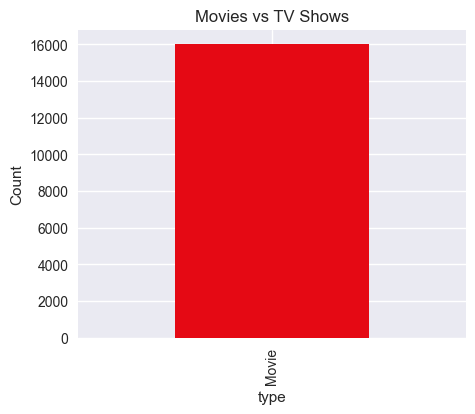

In [18]:
# 5. Movies vs TV Shows
plt.figure(figsize=(5,4))
df['type'].value_counts().plot(kind='bar', color=['#E50914', '#221f1f'])
plt.title('Movies vs TV Shows')
plt.ylabel('Count')
plt.show()

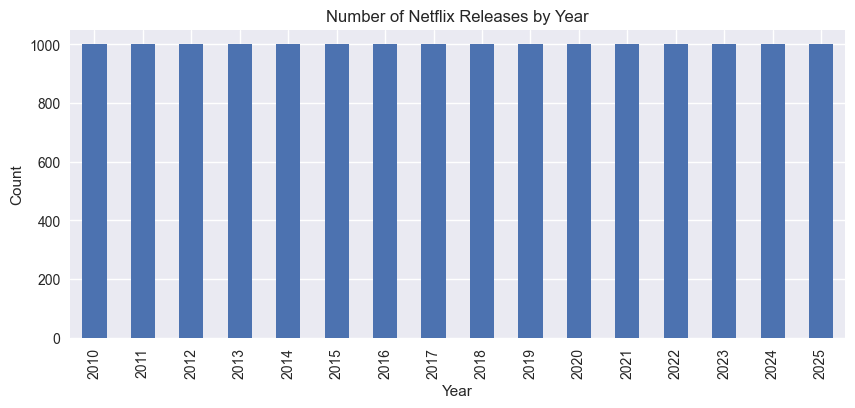

In [19]:
# 6. Releases per year
plt.figure(figsize=(10,4))
df['release_year'].value_counts().sort_index().plot(kind='bar')
plt.title('Number of Netflix Releases by Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

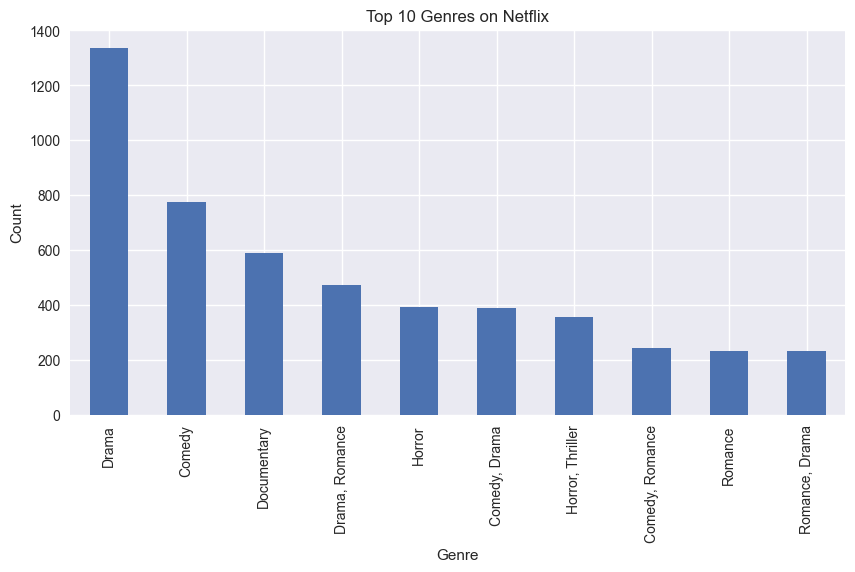

In [20]:
# 9. Top 10 genres
plt.figure(figsize=(10,5))
df['genres'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Genres on Netflix')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.show()

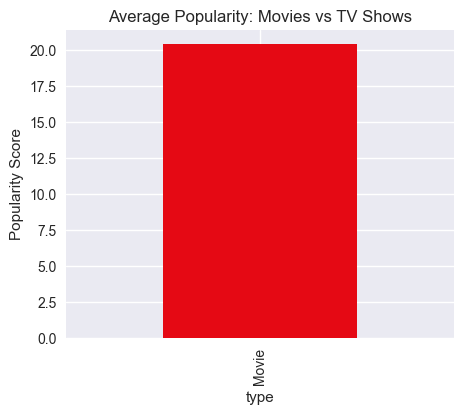

In [21]:
# 9. Average popularity by type
plt.figure(figsize=(5,4))
df.groupby('type')['popularity'].mean().plot(kind='bar', color=['#E50914', '#221f1f'])
plt.title('Average Popularity: Movies vs TV Shows')
plt.ylabel('Popularity Score')
plt.show()

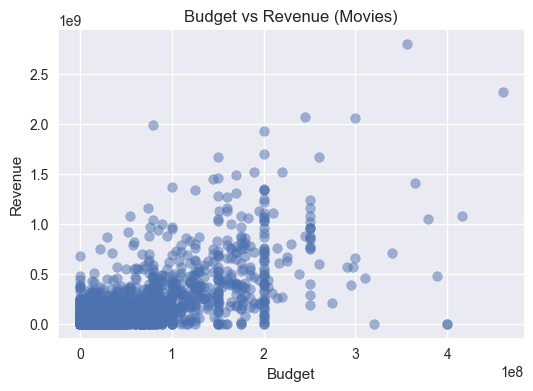

In [22]:
# 10. Budget vs Revenue (scatter plot for Movies only)
movies = df[df['type'] == 'Movie'].dropna(subset=['budget', 'revenue'])
plt.figure(figsize=(6,4))
plt.scatter(movies['budget'], movies['revenue'], alpha=0.5)
plt.title('Budget vs Revenue (Movies)')
plt.xlabel('Budget')
plt.ylabel('Revenue')
plt.show()

In [24]:
print(df['type'].value_counts())


type
Movie    16000
Name: count, dtype: int64


In [25]:
# 11. Save cleaned dataset (optional)
df.to_csv("netflix_cleaned.csv", index=False)

In [26]:
df_drama = df[df['genres'].str.contains('Drama', case=False, na=False)]
print(df_drama.shape)


(6910, 18)


In [27]:
df_tvshows = df[df['type'] == 'TV Show']
print(df_tvshows.shape)


(0, 18)


In [28]:
df_drama_movies = df[(df['type'] == 'Movie') & (df['genres'].str.contains('Drama', case=False, na=False))]
print(df_drama_movies.shape)


(6910, 18)


In [29]:
# Filter only movies (if your dataset has multiple types)
movies = df[df['type'] == 'Movie']

# Sort movies by vote_average in descending order
top_rated_movies = movies.sort_values(by='vote_average', ascending=False)

# Show top 10 movies with title, release_year, and rating
print(top_rated_movies[['title', 'release_year', 'vote_average']].head(10))


                                     title  release_year  vote_average
8972                Youthful Mother-in-law          2018          10.0
10261              Actresses: Sex Audition          2020          10.0
15906                            Butterfly          2025          10.0
7348                      The Photographer          2017          10.0
10425              Sincheon Station Exit 3          2020          10.0
14793                               Balota          2024          10.0
14794                                Marco          2024          10.0
10381                         The Shepherd          2020          10.0
14625                     Jailbreak Affair          2024          10.0
10881  Secret Night Of Mother And Daughter          2020          10.0


In [30]:
top_rated_movies_filtered = movies[movies['vote_count'] >= 50].sort_values(by='vote_average', ascending=False)

print(top_rated_movies_filtered[['title', 'release_year', 'vote_average', 'vote_count']].head(10))


                                                   title  release_year  \
14763                                           Succubus          2024   
7103                                                Nude          2017   
13392                                          Kill Shot          2023   
10878                       Break the Silence: The Movie          2020   
12784             BTS: Permission to Dance on Stage - LA          2022   
10601              The Three Deaths of Marisela Escobedo          2020   
12060                         Selena Gomez: My Mind & Me          2022   
9645                                     My First Client          2019   
1496   Lady Gaga Presents: The Monster Ball Tour at M...          2011   
14717                                           Underdog          2024   

       vote_average  vote_count  
14763           9.5         157  
7103            9.5         161  
13392           9.3         158  
10878           9.0         183  
12784          